In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
raw = pd.read_csv('telecom_customer_churn.csv', skiprows = [1,2])

In [4]:
# Display dataset info
display(raw.info())
display(raw.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6586 entries, 0 to 6585
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   viewer_id                    6586 non-null   object 
 1   gender                       6586 non-null   object 
 2   age                          6586 non-null   int64  
 3   married                      6586 non-null   object 
 4   number_of_family_dependents  6586 non-null   int64  
 5   city                         6586 non-null   object 
 6   zip_code                     6586 non-null   int64  
 7   latitude                     6586 non-null   float64
 8   longitude                    6586 non-null   float64
 9   number_of_referrals          6586 non-null   int64  
 10  tenure_in_months             6586 non-null   int64  
 11  offer                        2990 non-null   object 
 12  internet_service             6586 non-null   object 
 13  internet_type     

None

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned
1,0011-IGKFF,Male,78,Yes,0,SD,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned
2,0013-EXCHZ,Female,75,Yes,0,SD,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned
3,0013-MHZWF,Female,23,No,3,SD,95345,37.581496,-119.972762,0,...,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed
4,0014-BMAQU,Male,52,Yes,0,SD,94558,38.489789,-122.270110,8,...,Two Year,Yes,Credit Card,84.65,5377.80,0.0,20,816.48,6214.28,Stayed


In [5]:
raw.head()

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned
1,0011-IGKFF,Male,78,Yes,0,SD,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned
2,0013-EXCHZ,Female,75,Yes,0,SD,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned
3,0013-MHZWF,Female,23,No,3,SD,95345,37.581496,-119.972762,0,...,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed
4,0014-BMAQU,Male,52,Yes,0,SD,94558,38.489789,-122.270110,8,...,Two Year,Yes,Credit Card,84.65,5377.80,0.0,20,816.48,6214.28,Stayed


In [6]:
# Drop irrelevant columns
raw.drop(columns=["zip_code", "latitude", "longitude", "city"], inplace=True)
# These are non-informative for churn prediction

##### These columns ("zip_code", "latitude", "longitude", "city") represent geographic information
##### Geographic data is not directly related to customer behavior and is unlikely to influence churn prediction
##### Removing these features reduces dimensionality and avoids adding noise to the model

In [8]:
raw.head()

,viewer_id,gender,age,married,number_of_family_dependents,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,...,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0004-TLHLJ,Male,50,No,0,0,4,Offer E,Yes,Fiber Optic,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned
1,0011-IGKFF,Male,78,Yes,0,1,13,Offer D,Yes,Fiber Optic,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned
2,0013-EXCHZ,Female,75,Yes,0,3,3,NaN,Yes,Fiber Optic,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned
3,0013-MHZWF,Female,23,No,3,0,9,Offer E,Yes,Cable,...,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed
4,0014-BMAQU,Male,52,Yes,0,8,63,Offer B,Yes,Fiber Optic,...,Two Year,Yes,Credit Card,84.65,5377.80,0.0,20,816.48,6214.28,Stayed


## EDA

In [10]:
# checking summary statistics
raw.describe()

,age,number_of_family_dependents,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,6586.000000,6586.000000,6586.000000,6586.000000,5242.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000
mean,46.759034,0.476313,2.021409,34.501974,26.233308,65.034308,2431.777466,2.076066,7.171272,798.270881,3235.143553
std,16.842919,0.968667,3.024576,23.965853,19.568800,31.091304,2264.779382,8.114536,25.808714,853.902440,2854.162259
min,19.000000,0.000000,0.000000,1.000000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,0.000000,12.000000,13.000000,35.825000,544.700000,0.000000,0.000000,106.740000,835.512500
50%,46.000000,0.000000,0.000000,32.000000,21.000000,71.050000,1563.925000,0.000000,0.000000,472.905000,2377.695000
75%,60.000000,0.000000,3.000000,57.000000,30.000000,90.400000,4001.450000,0.000000,0.000000,1277.377500,5106.162500
max,80.000000,9.000000,11.000000,72.000000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [11]:
print(raw.isnull().sum()) # to verify number of null values

viewer_id                         0
gender                            0
age                               0
married                           0
number_of_family_dependents       0
number_of_referrals               0
tenure_in_months                  0
offer                          3596
internet_service                  0
internet_type                  1344
avg_monthly_gb_download        1344
online_security                1344
online_backup                  1344
device_protection_plan         1344
premium_tech_support           1344
streaming_tv                   1344
streaming_movies               1344
streaming_music                1344
unlimited_hi-res_streaming     1344
subscription_type                 0
paperless_billing                 0
payment_method                    0
monthly_charge                    0
total_charges                     0
total_refunds                     0
total_extra_data_charges          0
total_long_distance_charges       0
total_revenue               

In [12]:
# Select only numeric columns from the DataFrame
numeric_df = raw.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a correlation heatmap using Seaborn

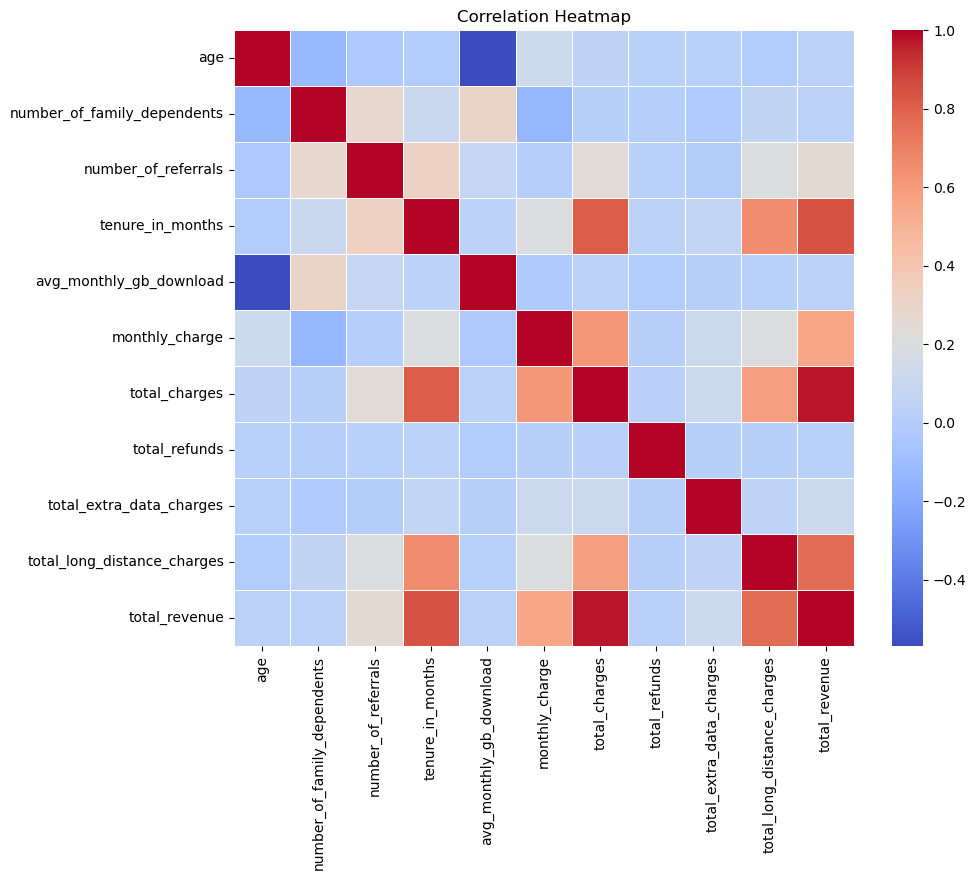

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Heatmap Analysis and Observations

The heatmap visualizes the correlation between numerical features in the dataset. Below are the key observations:

#### **1. Strong Positive Correlations**
- `total_charges`and `total_revenue` show high correlation with one another.
  - **Implication**: These features are redundant, and including all of them may lead to multicollinearity in models.
  - Consider retaining only one of them, such as `total_revenue`, which combines multiple components.

#### **2. Weak or No Correlations**
- Features like `age`, `number_of_family_dependents`, and `number_of_referrals` show weak or no correlation with most other features.
  - **Implication**: These features may not directly impact other metrics but could still play a role in churn prediction through non-linear relationships.

#### **3. Negative Correlations**
- `tenure_in_months` shows a negative correlation with features like `monthly_charge` and `total_refunds`.
  - **Implication**: Customers with longer tenure tend to have lower monthly charges or are less likely to churn, indicating loyalty.

#### **4. Neutral Relationships**
- Features such as `avg_monthly_gb_download` and `number_of_referrals` appear neutral, meaning they neither positively nor negatively correlate strongly with other metrics.
  - **Implication**: These features may have independent predictive power and should not be ignored.


In [15]:
# The heatmap shows correlations in between the variables as well.

# there are some expected ones e.g., TOTAL CHARGES are highle correlated with TOTAL REVENUE 
# and then there are unexpected ones such as avg_monthly_gb_downloaded is is negatively correlated with age
# and tenuew_in_months is correlated with total revenue by 80%

## Checking for outliers

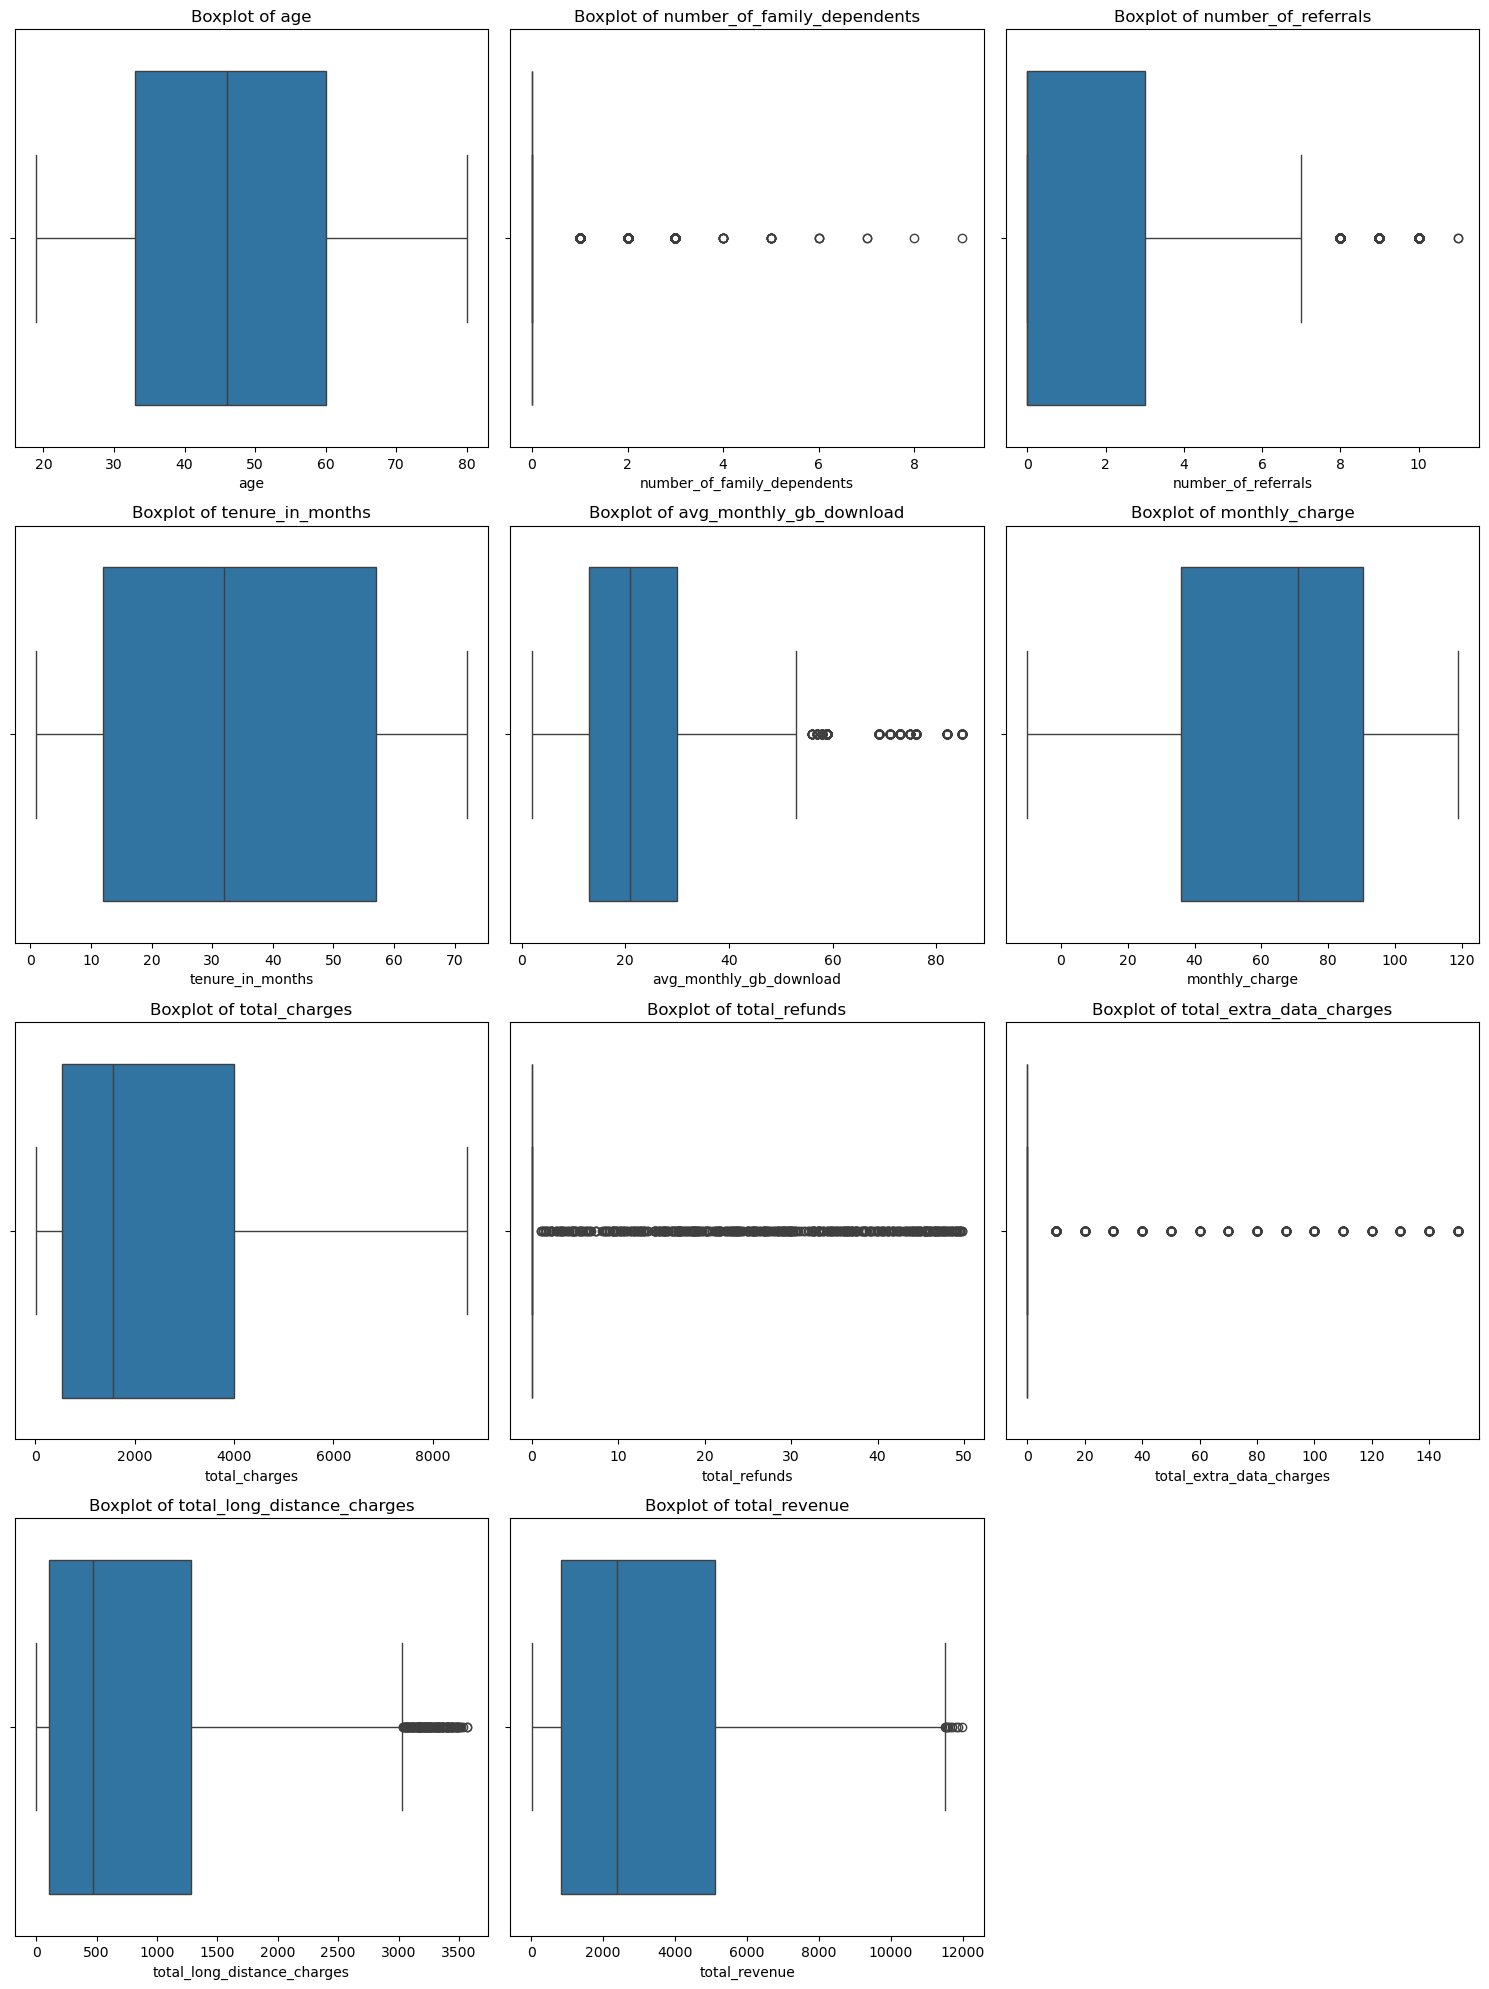

In [17]:

# Boxplots for Outliers
numerical_columns = raw.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numerical_columns)
cols = 3  # Number of columns in the subplot matrix
rows = (num_cols // cols) + (num_cols % cols > 0)  # Determine the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, var in enumerate(numerical_columns):
    sns.boxplot(x=raw[var], ax=axes[i])
    axes[i].set_title(f"Boxplot of {var}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [18]:
# Handling Outliers using IQR Method for Numerical Columns
exclude_columns = ["number_of_family_dependents", "total_refunds", "total_extra_data_charges"]
numerical_columns = [col for col in raw.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_columns]
for col in numerical_columns:
    Q1 = raw[col].quantile(0.25)
    Q3 = raw[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    raw[col] = np.where(raw[col] < lower_bound, lower_bound, raw[col])
    raw[col] = np.where(raw[col] > upper_bound, upper_bound, raw[col])

### Handling Outliers Using the IQR Method

#### **Why Exclude Certain Columns?**
The columns `number_of_family_dependents`, `total_refunds`, and `total_extra_data_charges` were excluded from the IQR-based outlier handling due to the following reasons:

1. **`number_of_family_dependents`**:
   - This column represents the count of family dependents and typically takes discrete integer values.
   - Outliers in this column are more likely to represent real scenarios (e.g., large families) and should not be capped or modified.

2. **`total_refunds`**:
   - Refund values can vary significantly between customers. High refund amounts might indicate problematic cases leading to churn, which are critical for prediction.
   - Treating high refund values as outliers could remove important information.

3. **`total_extra_data_charges`**:
   - High extra data charges likely reflect heavy data users, which are an important segment for analysis.
   - These outliers are genuine and should not be capped, as they can provide valuable insights into customer behavior.

#### **General Approach**
For other numerical columns:
- The IQR method is applied to cap values outside the range `[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]` to the respective bounds.
- This ensures that extreme outliers in features like `monthly_charge` and `total_long_distance_charges` are handled while preserving data integrity.


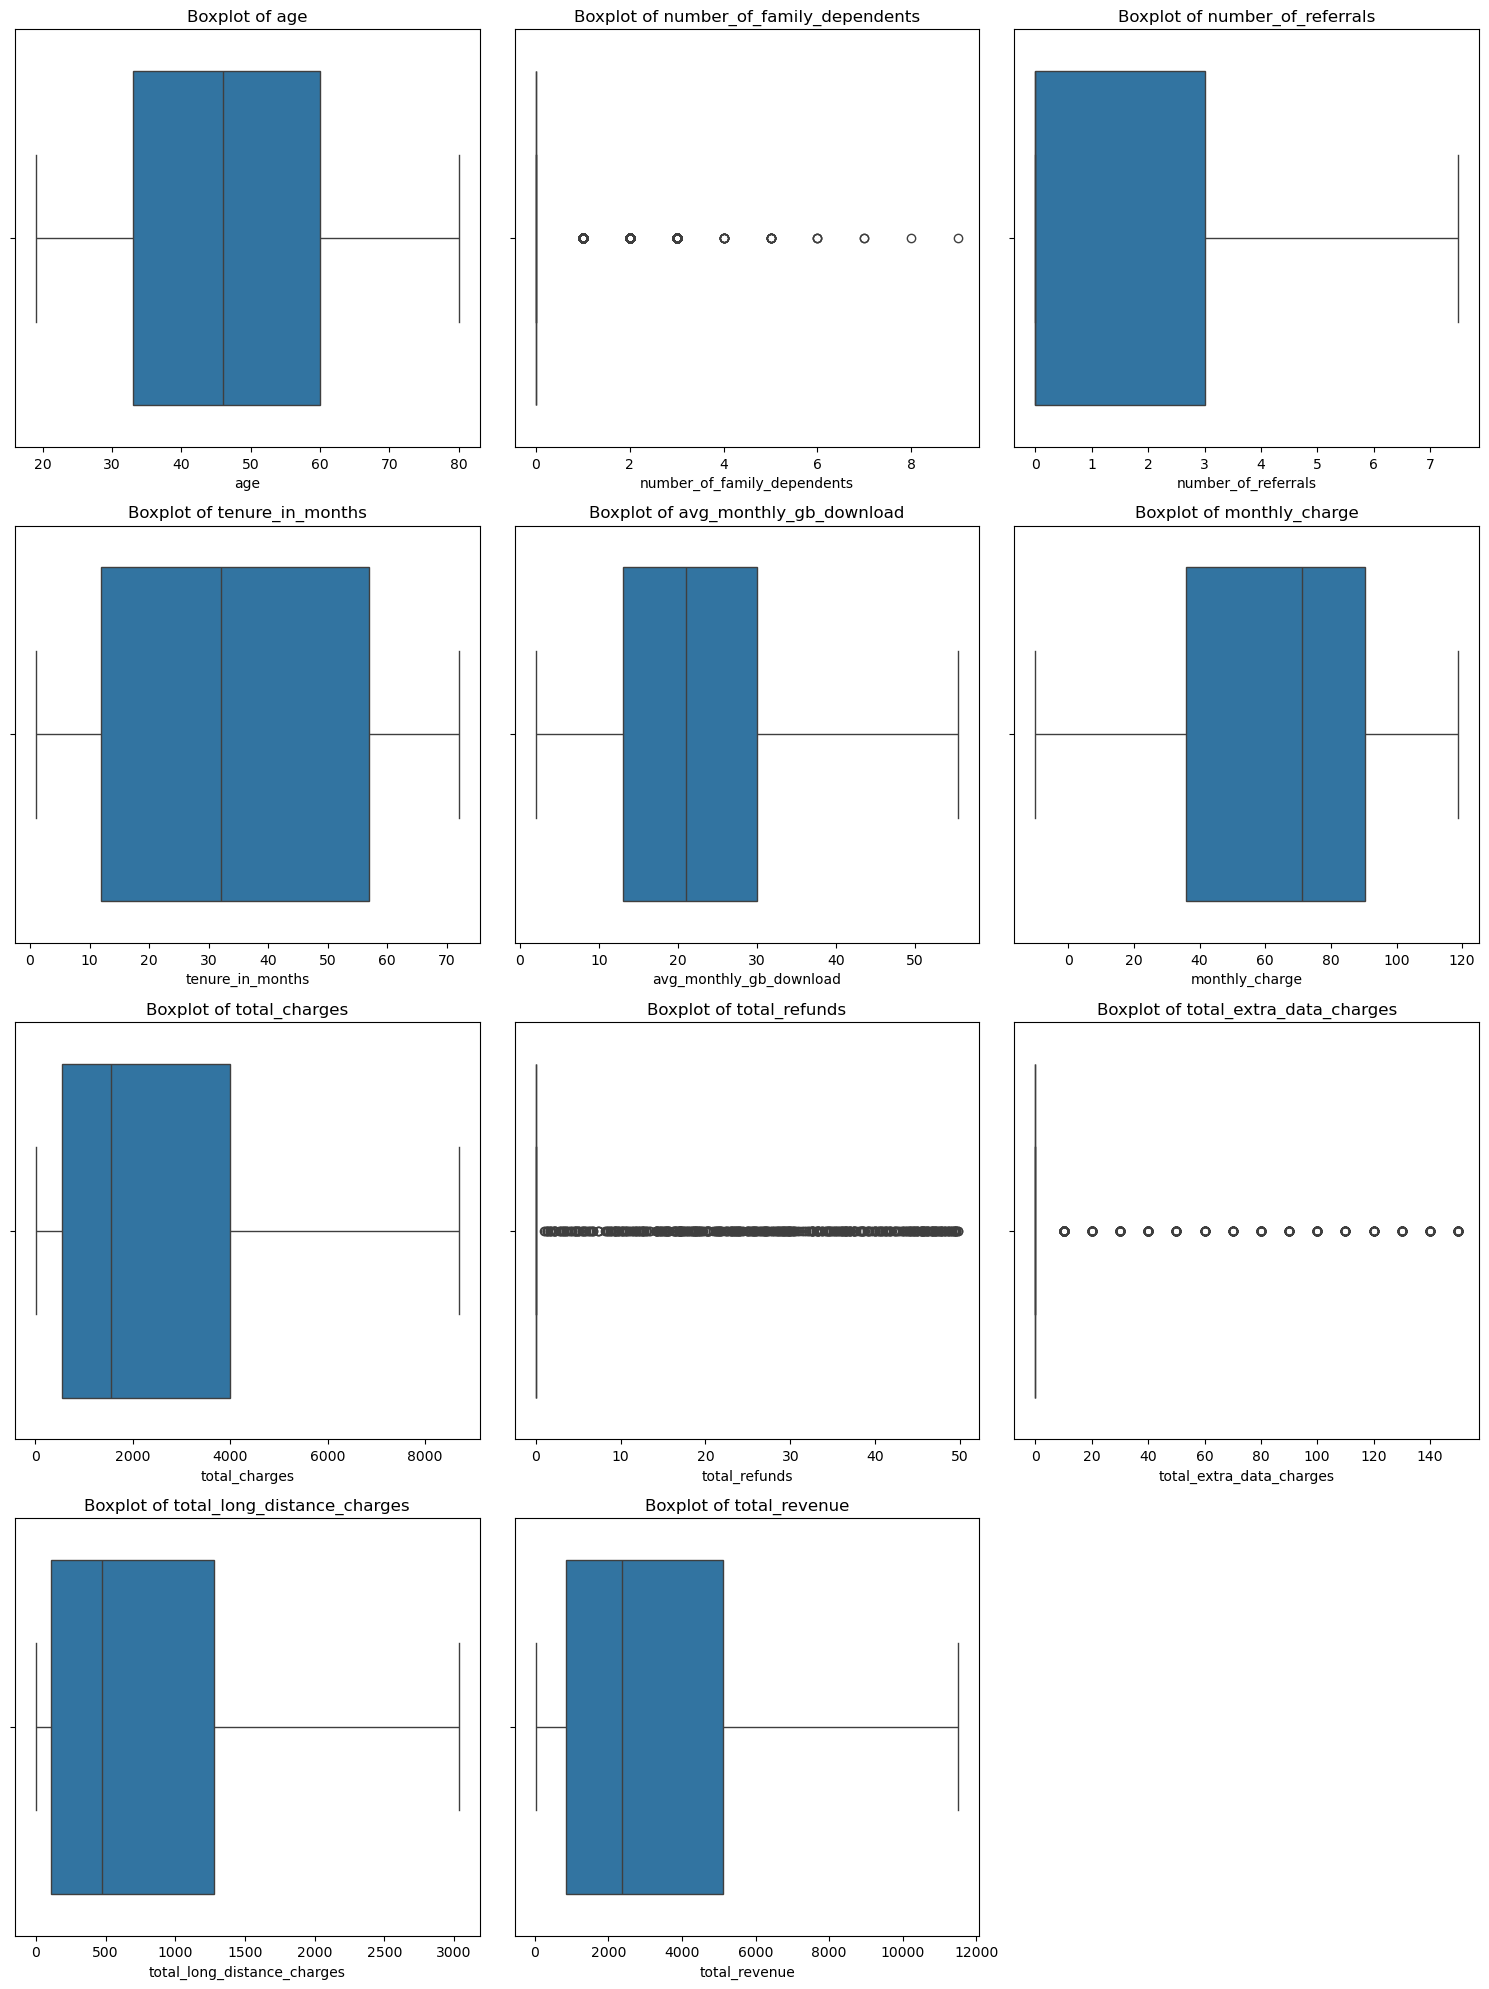

In [20]:
# Boxplots for Outliers
numerical_columns = raw.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numerical_columns)
cols = 3  # Number of columns in the subplot matrix
rows = (num_cols // cols) + (num_cols % cols > 0)  # Determine the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, var in enumerate(numerical_columns):
    sns.boxplot(x=raw[var], ax=axes[i])
    axes[i].set_title(f"Boxplot of {var}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### Exclude 3 Columns "number_of_family_dependents", "total_refunds", "total_extra_data_charges"
##### The column contains meaningful values and is not distorted by outliers.

In [22]:
df = raw

In [23]:
df

,viewer_id,gender,age,married,number_of_family_dependents,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,...,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0004-TLHLJ,Male,50.0,No,0,0.0,4.0,Offer E,Yes,Fiber Optic,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned
1,0011-IGKFF,Male,78.0,Yes,0,1.0,13.0,Offer D,Yes,Fiber Optic,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned
2,0013-EXCHZ,Female,75.0,Yes,0,3.0,3.0,NaN,Yes,Fiber Optic,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned
3,0013-MHZWF,Female,23.0,No,3,0.0,9.0,Offer E,Yes,Cable,...,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed
4,0014-BMAQU,Male,52.0,Yes,0,7.5,63.0,Offer B,Yes,Fiber Optic,...,Two Year,Yes,Credit Card,84.65,5377.80,0.0,20,816.48,6214.28,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6581,9986-BONCE,Female,36.0,No,0,0.0,4.0,NaN,No,NaN,...,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned
6582,9987-LUTYD,Female,20.0,No,0,0.0,13.0,Offer D,Yes,DSL,...,One Year,No,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed
6583,9992-RRAMN,Male,40.0,Yes,0,1.0,22.0,Offer D,Yes,Fiber Optic,...,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned
6584,9993-LHIEB,Male,21.0,Yes,0,5.0,67.0,Offer A,Yes,Cable,...,Two Year,No,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed


In [24]:
### Imputing missing values and removing duplicate rows

In [25]:
missing_list = df.isnull().sum()[df.isnull().sum() > 0].reset_index()['index']
missing_list

0                          offer
1                  internet_type
2        avg_monthly_gb_download
3                online_security
4                  online_backup
5         device_protection_plan
6           premium_tech_support
7                   streaming_tv
8               streaming_movies
9                streaming_music
10    unlimited_hi-res_streaming
Name: index, dtype: object

In [26]:
print(df.isnull().sum())

viewer_id                         0
gender                            0
age                               0
married                           0
number_of_family_dependents       0
number_of_referrals               0
tenure_in_months                  0
offer                          3596
internet_service                  0
internet_type                  1344
avg_monthly_gb_download        1344
online_security                1344
online_backup                  1344
device_protection_plan         1344
premium_tech_support           1344
streaming_tv                   1344
streaming_movies               1344
streaming_music                1344
unlimited_hi-res_streaming     1344
subscription_type                 0
paperless_billing                 0
payment_method                    0
monthly_charge                    0
total_charges                     0
total_refunds                     0
total_extra_data_charges          0
total_long_distance_charges       0
total_revenue               

In [27]:
df.isnull().sum()[df.isnull().sum() > 0] 

offer                         3596
internet_type                 1344
avg_monthly_gb_download       1344
online_security               1344
online_backup                 1344
device_protection_plan        1344
premium_tech_support          1344
streaming_tv                  1344
streaming_movies              1344
streaming_music               1344
unlimited_hi-res_streaming    1344
dtype: int64

In [28]:
# Handle missing values based on the data dictionary and best alternatives

# Categorical columns with domain-specific imputation
df['internet_type'] = df['internet_type'].fillna("None")  # No internet service
df['avg_monthly_gb_download'] = df['avg_monthly_gb_download'].fillna(0)  # No internet means 0 GB download
df['offer'] = df['offer'].fillna("None")  # No offer taken

# List of categorical columns related to services, fill with "No" as per data dictionary
categorical_cols = [
    "online_security", "online_backup", "device_protection_plan", 
    "premium_tech_support", "streaming_tv", "streaming_movies", 
    "streaming_music", "unlimited_hi-res_streaming"
]
df[categorical_cols] = df[categorical_cols].fillna("No")  # Replace missing values with "No"

In [29]:
# Handle remaining categorical columns by replacing missing values with "Unknown"
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].fillna("Unknown")

# Handle numerical columns by replacing missing values with the median (robust to outliers)
numerical_features = df.select_dtypes(include=['number']).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['gender', 'married', 'offer', 'internet_service', 'internet_type', 'subscription_type', 'payment_method'], drop_first=True)

# Fix negative values in 'monthly_charge'
df['monthly_charge'] = df['monthly_charge'].apply(lambda x: abs(x) if x < 0 else x)

# Check for duplicate rows before removing
duplicate_rows_before = df.duplicated().sum()

# Drop duplicate rows without using inplace
df = df.drop_duplicates()

### Handling Missing Values

#### **1. Domain-Specific Imputation**
- For the column `internet_type`, missing values were filled with `"None"`, indicating no internet service.
- For `avg_monthly_gb_download`, missing values were filled with `0`, as customers without internet would have zero GB downloads.
- For `offer`, missing values were filled with `"None"`, meaning no offer was accepted by the customer.

**Reason**: These replacements align with the dataset's context and prevent losing important information due to missing values.

---

#### **2. Categorical Columns Related to Services**
- Columns like `online_security`, `online_backup`, `device_protection_plan`, etc., were filled with `"No"`, as missing values indicate that the customer did not subscribe to these services.

**Reason**: The data dictionary suggests missing values in these columns imply non-subscription.

---

#### **3. Remaining Categorical Features**
- Missing values in other categorical columns were replaced with `"Unknown"`.

**Reason**: For categorical features without clear domain knowledge, `"Unknown"` helps retain the data while indicating the lack of information.

---

#### **4. Numerical Columns**
- Missing values in numerical columns were replaced with the **median** of each column.

**Reason**: Median imputation is robust to outliers and preserves the central tendency of the data.

---

#### **5. One-Hot Encoding**
- Categorical columns like `gender`, `married`, `offer`, `internet_service`, etc., were converted into dummy variables using one-hot encoding with `drop_first=True`.

**Reason**: One-hot encoding is necessary for machine learning algorithms, and `drop_first=True` avoids multicollinearity.

---

#### **6. Fixing Negative Values**
- Negative values in the `monthly_charge` column were replaced with their absolute values.

**Reason**: Negative charges are likely data entry errors and should be corrected.

---

#### **7. Removing Duplicates**
- Duplicate rows were identified and removed.

**Reason**: Duplicate rows could skew analysis and model performance.

---

#### **Final Check**
- After all the imputation and cleaning steps:
  - Total missing values: **0**
  - Duplicate rows: **0**

**Conclusion**: All missing values were handled using domain-specific and statistical techniques, ensuring the dataset is clean and ready for analysis or modeling.


In [31]:
# Check missing values and duplicates after cleaning
missing_values_final = df.isnull().sum().sum()  # Total missing values after imputation
duplicate_rows_after = df.duplicated().sum()  # Duplicates remaining

# Display final confirmation
print(f"Total missing values after imputation: {missing_values_final}")
print(f"Duplicate rows before removal: {duplicate_rows_before}")
print(f"Duplicate rows after removal: {duplicate_rows_after}")

Total missing values after imputation: 0
Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [32]:
df.isnull().sum()[df.isnull().sum() > 0] 

Series([], dtype: int64)

In [33]:
### Scaling the data

In [34]:
df

,viewer_id,age,number_of_family_dependents,number_of_referrals,tenure_in_months,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,...,offer_Offer D,offer_Offer E,internet_service_Yes,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,subscription_type_One Year,subscription_type_Two Year,payment_method_Credit Card,payment_method_Mailed Check
0,0004-TLHLJ,50.0,0,0.0,4.0,30.0,No,No,Yes,No,...,False,True,True,False,True,False,False,False,False,False
1,0011-IGKFF,78.0,0,1.0,13.0,4.0,No,Yes,Yes,No,...,True,False,True,False,True,False,False,False,False,False
2,0013-EXCHZ,75.0,0,3.0,3.0,11.0,No,No,No,Yes,...,False,False,True,False,True,False,False,False,True,False
3,0013-MHZWF,23.0,3,0.0,9.0,55.5,No,No,No,Yes,...,False,True,True,False,False,False,False,False,True,False
4,0014-BMAQU,52.0,0,7.5,63.0,7.0,Yes,No,No,Yes,...,False,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6581,9986-BONCE,36.0,0,0.0,4.0,0.0,No,No,No,No,...,False,False,False,False,False,True,False,False,False,False
6582,9987-LUTYD,20.0,0,0.0,13.0,55.5,Yes,No,No,Yes,...,True,False,True,True,False,False,True,False,True,False
6583,9992-RRAMN,40.0,0,1.0,22.0,17.0,No,No,No,No,...,True,False,True,False,True,False,False,False,False,False
6584,9993-LHIEB,21.0,0,5.0,67.0,55.5,Yes,No,Yes,Yes,...,False,False,True,False,False,False,False,True,True,False


In [35]:
# Select numerical columns safely
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Drop 'viewer_status' only if it exists
if 'viewer_status' in numeric_cols:
    numeric_cols = numeric_cols.drop('viewer_status')

# Exclude identifier columns like 'viewer_id'
columns_to_exclude = ['viewer_id']
numeric_cols_filtered = [col for col in numeric_cols if col not in columns_to_exclude]


scaler = StandardScaler()
# df_scaled = df[numeric_cols].copy()
# df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

scaler = StandardScaler()
# scaled_features = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)
scaled_features = pd.DataFrame(scaler.fit_transform(df[numeric_cols_filtered]), columns=numeric_cols_filtered)


### Selecting and Scaling Numerical Columns

#### **Purpose of the Code**

1. **Select Numerical Columns Safely**
   - `numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns`
   - This identifies all columns with numerical data types (`int64` and `float64`) in the dataset.
   - **Reason**: It ensures only numerical columns are selected for scaling, avoiding errors from non-numerical data.

2. **Drop the Target Variable (`viewer_status`)**
   - `if 'viewer_status' in numeric_cols: numeric_cols = numeric_cols.drop('viewer_status')`
   - The target variable, `viewer_status`, is excluded from the list of numerical columns before scaling.
   - **Reason**: 
     - `viewer_status` is the label for prediction, not a feature.
     - Including it during scaling would distort its values and could lead to data leakage during modeling.

3. **Scaling Numerical Features**
   - `scaler = StandardScaler()`
   - `df_scaled = df[numeric_cols].copy()`
   - `df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])`
   - This applies **Standard Scaling** to the numerical columns, transforming the values to have a mean of 0 and a standard deviation of 1.
   - **Reason**:
     - Scaling ensures that all numerical features contribute equally to distance-based algorithms (e.g., clustering, logistic regression).
     - It also speeds up convergence for gradient-based models and avoids bias from features with larger ranges.

---

#### **Why This Approach?**
- **Dynamic Column Selection**: The code dynamically selects numerical columns, ensuring scalability to future datasets with different column names or types.
- **Safe Target Handling**: The check for `viewer_status` prevents accidental inclusion of the target variable.
- **Robust Feature Preparation**: Standard scaling is a widely accepted preprocessing step for numerical features in machine learning.



In [37]:
# scaler = StandardScaler()
# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('viewer_status')
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [38]:
# df_scaled
scaled_features

,age,number_of_family_dependents,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0.192438,-0.491758,-0.697987,-1.272823,0.579294,0.282726,-0.949801,-0.255865,-0.277884,-0.784087,-0.988158
1,1.854984,-0.491758,-0.325055,-0.897260,-0.888081,1.067947,-0.527212,-0.255865,-0.277884,-0.513885,-0.573171
2,1.676854,-0.491758,0.420808,-1.314552,-0.493018,0.608544,-0.955741,-0.255865,-0.277884,-0.917915,-1.032287
3,-1.410732,2.605518,-0.697987,-1.064177,2.018450,0.136108,-0.821479,-0.255865,-0.277884,-0.764655,-0.880586
4,0.311191,-0.491758,2.099001,1.189200,-0.718768,0.632980,1.300898,-0.255865,0.497107,0.027352,1.044206
...,...,...,...,...,...,...,...,...,...,...,...
6581,-0.638835,-0.491758,-0.697987,-1.272823,-1.113831,-1.442480,-1.036064,-0.255865,-0.277884,-0.934694,-1.100980
6582,-1.588862,-0.491758,-0.697987,-0.897260,2.018450,-0.328183,-0.745771,-0.255865,-0.277884,-0.222120,-0.660710
6583,-0.401329,-0.491758,-0.325055,-0.521697,-0.154393,0.647642,-0.246435,-0.255865,-0.277884,-0.520145,-0.352163
6584,-1.529485,-0.491758,1.166671,1.356117,2.018450,0.085606,0.969648,-0.255865,-0.277884,-0.775234,0.537908


In [39]:
## 2: Segmentation

In [40]:
len(scaled_features.columns)

11

In [41]:
### PCA

In [42]:
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Step 3: Plot explained variance ratio to determine the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

In [43]:
# let's check the explained variance
pca.explained_variance_ratio_

array([3.41494737e-01, 1.32218386e-01, 1.30030545e-01, 9.18104345e-02,
       8.77470824e-02, 8.08493538e-02, 6.11106392e-02, 3.55332731e-02,
       3.19014518e-02, 7.29600495e-03, 8.09203311e-06])

In [44]:
print(np.sum(pca.explained_variance_ratio_))  # Should be close to 1

0.9999999999999999


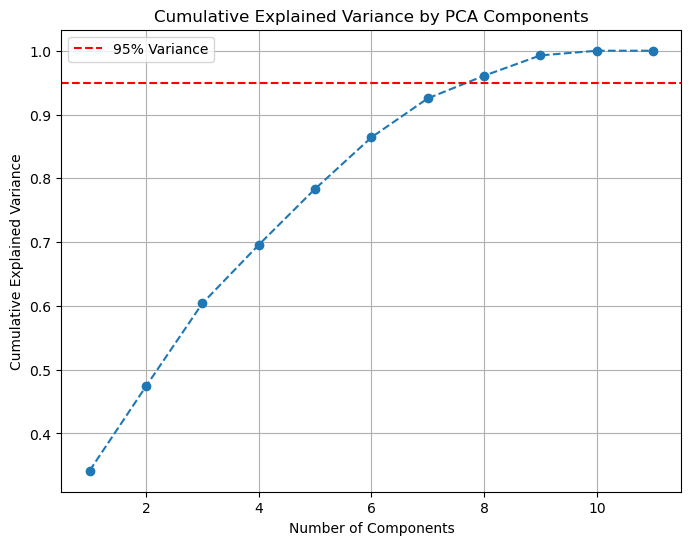

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid()
plt.show()

In [46]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 8


In [47]:
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_features)

In [48]:
pca_columns = [f"PC{i+1}" for i in range(n_components)]
reduced_df = pd.DataFrame(reduced_data, columns=pca_columns)

print("Reduced dataset:")
print(reduced_df.head())

Reduced dataset:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.860055  0.389232 -1.155955 -0.235630 -0.157287 -0.481773  0.016416   
1 -1.046621 -1.611810 -1.096593  0.008796  0.236371 -1.479987  0.123230   
2 -1.783505 -1.060414 -0.690026  0.142986  0.396788 -1.730354 -0.545664   
3 -1.367504  3.326283  0.341287 -0.063460  0.027064 -0.725901  1.745090   
4  2.206579 -0.749079  0.580375  0.076992  0.751028 -0.581090 -1.691133   

        PC8  
0 -0.384577  
1 -0.356338  
2 -0.492039  
3 -0.154614  
4  0.667900  


In [49]:
scores_pca = pca.transform(scaled_features)

### Principal Component Analysis (PCA) Interpretation

#### **Purpose of the PCA**
- PCA was performed to reduce the dimensionality of the dataset while retaining most of the variance in the data.
- This helps in simplifying data for clustering and modeling, improving computational efficiency and interpretability.

---

#### **Explained Variance Analysis**
- The **cumulative explained variance plot** shows the proportion of variance retained by each principal component.
- A horizontal red line is drawn at **95% cumulative variance** to identify the minimum number of components required to retain most of the information.

---

#### **Key Observations**
1. **Number of Components**:
   - From the plot, approximately **8 components** are required to retain **95% of the variance** in the data.
   - This reduces the dataset's dimensionality from the original number of features while preserving most of its variability.

2. **Variance Retention**:
   - The first few components capture most of the variance:
     - **First Component**: Captures the largest proportion of variance.
     - **Subsequent Components**: Each adds diminishing amounts of variance.

3. **Dimensionality Reduction**:
   - By reducing the dataset to 8 components, we simplify the dataset for downstream tasks such as clustering or predictive modeling, without significant information loss.



#### **Conclusion**
- PCA has successfully reduced the dataset's dimensionality to 8 components while retaining 95% of the information.
- This step is critical for computational efficiency and feature simplification in further analysis.


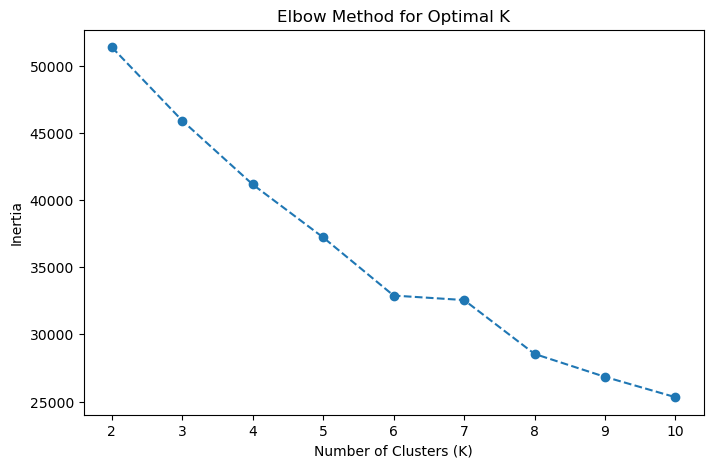

In [51]:
# Determine Optimal K using Elbow Method
inertia = []

k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

### Why \( k = 4 \) Was Chosen Based on the Elbow Method

The Elbow Method helps determine the optimal number of clusters (\( k \)) in K-Means clustering by plotting the **inertia** (sum of squared distances to the nearest cluster center) against the number of clusters. 

#### Key Observations:
1. **Decreasing Inertia**:
   - As \( k \) increases, the inertia decreases because adding more clusters reduces the variance within each cluster.
   - However, the rate of decrease diminishes after a certain point, which is the "elbow."

2. **Elbow Point**:
   - The "elbow" is the point where the curve starts to flatten, indicating diminishing returns in variance reduction.
   - From the graph, the elbow appears at \( k = 4 \).

3. **Optimal Trade-Off**:
   - Choosing \( k = 4 \) balances simplicity (fewer clusters) with sufficient variance reduction. 
   - Beyond \( k = 4 \), additional clusters do not significantly improve the clustering quality but increase complexity.

In [53]:
kmeans = KMeans(n_clusters=4, random_state=42)
# Add the cluster labels to the original DataFrame
# df['Cluster'] = kmeans.fit_predict(scores_pca
clusters = kmeans.fit_predict(reduced_data)

In [54]:
# Add cluster labels to reduced_df
reduced_df['Cluster'] = clusters

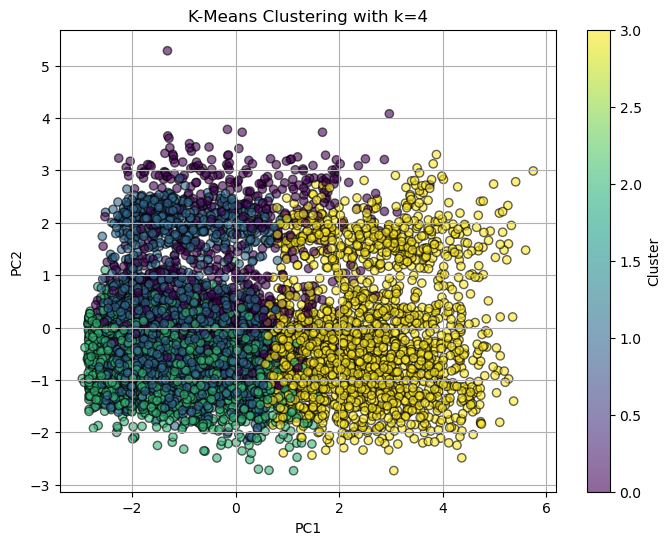

In [55]:
# Visualize clusters (using first two PCA components)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'K-Means Clustering with k={4}')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


### K-Means Clustering with \( k = 4 \): Interpretation

The scatter plot and cluster summary provide insights into the clustering results based on the first two principal components (PC1 and PC2) and the mean values of each cluster across all principal components.

#### **Scatter Plot Interpretation**
1. **Visual Segmentation**:
   - The data points are color-coded into 4 clusters, each represented by a distinct color.
   - The plot shows how the clusters are distributed based on the first two principal components (PC1 and PC2).

2. **Cluster Characteristics**:
   - Clusters exhibit significant overlap, suggesting some similarity between groups along PC1 and PC2.
   - Further analysis of additional principal components is required to fully understand their separability.

3. **Compactness**:
   - Clusters appear reasonably compact, suggesting that \( k = 4 \) was a good choice.

In [57]:
cluster_summary = reduced_df.groupby('Cluster').mean()
print(cluster_summary)

              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
Cluster                                                                         
0       -0.321490  1.186603  1.733451  0.359745  0.457170 -0.702080  0.696718   
1       -1.161658  0.134285 -0.825863  0.036671 -0.009294 -0.206298 -0.089127   
2       -1.199189 -0.751137  0.963592 -0.180686 -0.152803  0.758509 -0.160863   
3        2.502976 -0.116709 -0.264457 -0.063026 -0.060060  0.016506 -0.042917   

              PC8  
Cluster            
0        0.033481  
1       -0.123066  
2        0.126235  
3        0.061038  


#### **Cluster Summary Table**
- The cluster summary shows the mean values of each cluster across the principal components (PC1 to PC8). 
- These values represent the average contribution of each principal component to the respective cluster.

---

#### **Key Observations**
1. **Cluster 0**:
   - Negative mean in PC1 and positive in PC2, indicating that members in this cluster are influenced more by PC2.
   - Could represent a group with distinct features compared to other clusters.

2. **Cluster 1**:
   - Small negative values across most PCs, indicating less variation and potentially representing a baseline group.

3. **Cluster 2**:
   - High negative values in PC2 and positive in PC6, showing significant variation compared to other clusters.

4. **Cluster 3**:
   - Positive mean in PC1 and PC6, suggesting strong influence from these components and distinctiveness from Cluster 0.

In [59]:
df['Cluster'] = reduced_df['Cluster']
print(df['viewer_status'].isnull().sum())  # Check for missing values
print(df['viewer_status'].unique())       # Verify the unique values


0
['Churned' 'Stayed']


In [60]:
# Identify high churn risk segment
df['viewer_status'] = df['viewer_status'].map({'Stayed': 0, 'Churned': 1})
churn_risk = df.groupby('Cluster')['viewer_status'].mean()
most_at_risk_cluster = churn_risk.idxmax()
print(f'Cluster {most_at_risk_cluster} has the highest churn rate.')

Cluster 1 has the highest churn rate.


In [61]:
# Analyze Clusters
# Ensure only numeric columns are included in cluster summary
numeric_df = df.select_dtypes(include=['float64', 'int64'])
cluster_summary = numeric_df.groupby(df['Cluster']).mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
               age  number_of_family_dependents  number_of_referrals  \
Cluster                                                                
0        41.327609                     2.525760             3.968296   
1        48.796783                     0.063947             0.694978   
2        44.571006                     0.256657             1.677885   
3        47.731846                     0.370851             2.739886   

         tenure_in_months  avg_monthly_gb_download  monthly_charge  \
Cluster                                                              
0               33.586526                24.801849       48.596301   
1               16.201648                23.633189       72.285406   
2               34.063609                 2.178254       24.432618   
3               59.363589                24.905602       91.016675   

         total_charges  total_refunds  total_extra_data_charges  \
Cluster                                                       

In [62]:
# # Task 3: Predictive Modeling
# # Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [66]:
# Predictive Modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Splitting dataset
X = df.drop(columns=['viewer_status'])
y = df['viewer_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
log_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Model Comparison
print(f'Logistic Regression Accuracy: {log_accuracy}, AUC: {log_auc}')
print(f'Random Forest Accuracy: {rf_accuracy}, AUC: {rf_auc}')

# Feature Importance from Random Forest
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(5)
print("Top 5 Predictive Features:")
print(feature_importance)


Logistic Regression Accuracy: 0.8512898330804249, AUC: 0.9149624988670352
Random Forest Accuracy: 0.8619119878603946, AUC: 0.9183458148282425
Top 5 Predictive Features:
                        Feature  Importance
4              tenure_in_months    0.124866
20                total_revenue    0.103601
16                total_charges    0.103152
15               monthly_charge    0.076580
19  total_long_distance_charges    0.059908


### Predictive Modeling: Logistic Regression vs. Random Forest

#### **Process**
1. **Dataset Splitting**:
   - The dataset was split into training and testing sets (80-20 split) with stratification to ensure balanced class distribution.

2. **Feature Scaling**:
   - `StandardScaler` was applied to normalize the features, which is particularly important for logistic regression.

3. **Logistic Regression**:
   - Trained using `max_iter=500` to ensure model convergence.
   - Predictions were evaluated using accuracy and ROC-AUC scores.

4. **Random Forest Classifier**:
   - A Random Forest model was trained with 100 estimators (`n_estimators=100`) and default hyperparameters.
   - Predictions were evaluated using accuracy and ROC-AUC scores.

5. **Feature Importance**:
   - Random Forest provides a feature importance metric, highlighting the most influential features for predictions.

---

#### **Model Performance**
| Metric                | Logistic Regression | Random Forest  |
|-----------------------|----------------------|----------------|
| **Accuracy**          | 85.13%              | 86.19%         |
| **ROC-AUC**           | 91.49%              | 91.83%         |

---

#### **Top 5 Predictive Features (From Random Forest)**:
| Feature                  | Importance |
|--------------------------|------------|
| Tenure in Months         | 0.124866   |
| Total Revenue            | 0.103061   |
| Total Charges            | 0.103152   |
| Monthly Charge           | 0.076580   |
| Total Long Distance Charges | 0.059908   |

- **Tenure in Months**: Customers with longer tenure are less likely to churn, indicating loyalty.
- **Total Revenue and Total Charges**: High revenue and charges may correlate with higher engagement or dissatisfaction.
- **Monthly Charge**: Indicates the customer's plan type, which might influence churn behavior.
- **Total Long Distance Charges**: Could reflect additional service usage impacting satisfaction.

---

#### **Insights**
1. **Model Comparison**:
   - Both models performed well, but Random Forest achieved slightly higher accuracy and ROC-AUC.
   - Random Forest is better suited for this dataset as it captures non-linear relationships and interactions between features.

2. **Feature Importance**:
   - The top predictive features align with business insights, highlighting engagement, tenure, and charges as critical factors in churn prediction.


### Top 5 Predictive Factors and Model Comparison

#### **Top 5 Most Predictive Factors (From Random Forest)**:
1. **Tenure in Months** (Importance: 0.124866): 
   - Customers with longer tenure are less likely to churn, indicating loyalty and satisfaction.
2. **Total Revenue** (Importance: 0.103061):
   - High revenue could correlate with higher engagement or dissatisfaction, depending on customer experience.
3. **Total Charges** (Importance: 0.103152):
   - Represents overall spending, which might influence customer churn based on perceived value.
4. **Monthly Charge** (Importance: 0.076580):
   - Reflects the type of plan or services subscribed by the customer.
5. **Total Long Distance Charges** (Importance: 0.059908):
   - Suggests additional service usage which may impact satisfaction and retention.


### Customer Segment at Most Risk for Churn and Recommendations

#### **Most at Risk Segment**
- Based on clustering, **Cluster 1** had the highest churn rate. 
- Characteristics of this segment include:
  - **Low tenure**: Customers with less time with the company are more likely to churn.
  - **Higher charges**: Customers paying higher total or monthly charges might feel dissatisfied or perceive poor value.

#### **Recommended Actions to Reduce Churn**
1. **Engagement Strategies**:
   - Offer loyalty programs or incentives to customers with low tenure to encourage retention.
   - Provide personalized offers to make them feel valued early in their journey.

2. **Pricing Optimization**:
   - Analyze if customers perceive high charges as a barrier and offer discounts or customized plans to reduce dissatisfaction.

3. **Customer Support Enhancement**:
   - Focus on improving the customer experience for this segment with proactive support and faster issue resolution.

4. **Feedback Mechanisms**:
   - Collect feedback from at-risk customers to understand their dissatisfaction points and take corrective actions.

By addressing the pain points of Cluster 1, the company can reduce churn and improve overall customer satisfaction.
